- 송파구 5개, 강남구 5개, 서초구 5개, 강서구 5개, 영등포구 5개, 뮤, 람다, 가용도, 초과수요율 분석해보기
- 동일 지역 (예.구)에 있는 station들 간의 가용율, 초과수요율 분석을 통해서 어떠한 정보를 제공할 수 있을지, 
- 특정 요인 (예. 시간대, 지하철 역/대형마트 근처와 같은 지역특성 등)에 의한 차이가 발생하는지 등등을 고민해보기 바랍니다.

#### 21년 6월 기준 강남구 대여건수 top 5 station
1. 현대고등학교 건너편	3144
2. 수서역 5번출구 뒤	3085
3. 압구정나들목	2595
4. 삼호물산버스정류장(23370) 옆	2318
5. 자곡사거리	2288

#### 21년 6월 기준 강남구 대여건수 하위 5 station
1. 신청담나들목	51
2. 일원1동주민센터앞 사거리	49
3. 개포1단지아파트 입구 (보도육교)	34
4. 삼성중앙역·플래티넘아파트 정류소	30
5. 구룡터널 입구(개포1단지아파트)	5

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
df = pd.read_csv('./대학원/데이터/따릉이 데이터/정리 데이터/공공자전거 대여이력/공공자전거 대여이력_2021.06.csv', engine = 'python')
df

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-30385,2021-05-31 23:07:00,3571,화양 APT(횡단보도 옆),0,2021-06-01 00:00:00,3538,서울숲 IT캐슬,0,53,2502.80
1,SPB-46321,2021-05-31 23:37:19,1911,구로디지털단지역 앞,0,2021-06-01 00:00:02,1843,독산고등학교,0,22,1630.00
2,SPB-48119,2021-05-31 23:48:40,3860,건국대학교 정문 앞,0,2021-06-01 00:00:03,3586,군자역 비채온 오피스텔,0,11,1420.00
3,SPB-55360,2021-05-31 23:47:52,2222,사당역 12번출구 뒤,0,2021-06-01 00:00:05,2228,뒷벌공원 옆,0,12,1350.00
4,SPB-54699,2021-05-31 23:51:14,1955,디지털입구 교차로,0,2021-06-01 00:00:08,1856,모두의학교,0,8,930.00
...,...,...,...,...,...,...,...,...,...,...,...
3445866,SPB-36886,2021-06-30 22:44:14,152,마포구민체육센터 앞,0,2021-07-01 04:48:33,126,서강대 후문 옆,0,364,10153.36
3445867,SPB-30409,2021-06-30 22:45:19,152,마포구민체육센터 앞,0,2021-07-01 04:52:25,437,대흥역 1번출구,0,367,10100.71
3445868,SPB-46230,2021-06-30 22:43:43,152,마포구민체육센터 앞,0,2021-07-01 04:52:27,437,대흥역 1번출구,0,368,430.00
3445869,SPB-41691,2021-06-30 22:11:14,2220,반포본동 주민센터 앞,0,2021-07-01 04:55:29,2526,반포경남쇼핑 앞,0,404,0.00


In [3]:
df.isnull().sum()

자전거번호      0
대여일시       0
대여대여소번호    0
대여대여소명     0
대여거치대      0
반납일시       0
반납대여소번호    0
반납대여소명     0
반납거치대      0
이용시간       0
이용거리       0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3445871 entries, 0 to 3445870
Data columns (total 11 columns):
 #   Column   Dtype  
---  ------   -----  
 0   자전거번호    object 
 1   대여일시     object 
 2   대여대여소번호  int64  
 3   대여대여소명   object 
 4   대여거치대    int64  
 5   반납일시     object 
 6   반납대여소번호  int64  
 7   반납대여소명   object 
 8   반납거치대    int64  
 9   이용시간     int64  
 10  이용거리     float64
dtypes: float64(1), int64(5), object(5)
memory usage: 289.2+ MB


In [5]:
df.describe()

,대여대여소번호,대여거치대,반납대여소번호,반납거치대,이용시간,이용거리
count,3.445871e+06,3.445871e+06,3.445871e+06,3.445871e+06,3.445871e+06,3.445871e+06
mean,1.689628e+03,2.556263e+00,1.687082e+03,2.552268e+00,2.588709e+01,3.060081e+03
std,1.246268e+03,1.569001e+01,1.240972e+03,1.567813e+01,2.828476e+01,3.728572e+03
min,3.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,6.740000e+02,0.000000e+00,6.800000e+02,0.000000e+00,8.000000e+00,8.878150e+02
50%,1.362000e+03,0.000000e+00,1.360000e+03,0.000000e+00,1.500000e+01,1.749740e+03
75%,2.408000e+03,0.000000e+00,2.389000e+03,0.000000e+00,3.500000e+01,3.677280e+03
max,9.999900e+04,9.900000e+01,9.999900e+04,9.900000e+01,1.272000e+03,1.993206e+05


In [6]:
df = df.drop(['자전거번호', '대여대여소번호', '대여거치대', '반납대여소번호', '반납거치대', '이용시간', '이용거리'], axis = 1)
df.head()

,대여일시,대여대여소명,반납일시,반납대여소명
0,2021-05-31 23:07:00,화양 APT(횡단보도 옆),2021-06-01 00:00:00,서울숲 IT캐슬
1,2021-05-31 23:37:19,구로디지털단지역 앞,2021-06-01 00:00:02,독산고등학교
2,2021-05-31 23:48:40,건국대학교 정문 앞,2021-06-01 00:00:03,군자역 비채온 오피스텔
3,2021-05-31 23:47:52,사당역 12번출구 뒤,2021-06-01 00:00:05,뒷벌공원 옆
4,2021-05-31 23:51:14,디지털입구 교차로,2021-06-01 00:00:08,모두의학교


In [7]:
df['대여일시'] = pd.to_datetime(df['대여일시'])
df['반납일시'] = pd.to_datetime(df['반납일시'])

In [8]:
df['대여월'] = df['대여일시'].dt.month
df['대여일'] = df['대여일시'].dt.day
df['대여요일'] = df['대여일시'].dt.dayofweek
df['대여시간'] = df['대여일시'].dt.hour
df['대여시간_분'] = df['대여일시'].dt.minute

df['반납월'] = df['반납일시'].dt.month
df['반납일'] = df['반납일시'].dt.day
df['반납요일'] = df['반납일시'].dt.dayofweek
df['반납시간'] = df['반납일시'].dt.hour
df['반납시간_분'] = df['반납일시'].dt.minute

In [9]:
df = df.sort_values('대여일시', ignore_index = True)
df.head()

,대여일시,대여대여소명,반납일시,반납대여소명,대여월,대여일,대여요일,대여시간,대여시간_분,반납월,반납일,반납요일,반납시간,반납시간_분
0,2021-05-31 18:39:50,신목동역 2번 출구,2021-06-01 00:10:23,목동아파트2단지 222동 앞,5,31,0,18,39,6,1,1,0,10
1,2021-05-31 19:03:06,잠실새내역 1번출구,2021-06-01 00:27:39,잠실본동주민센터뒤 잠실근린공원,5,31,0,19,3,6,1,1,0,27
2,2021-05-31 19:16:35,조원동서울본병원,2021-06-01 00:15:25,봉림교 교통섬,5,31,0,19,16,6,1,1,0,15
3,2021-05-31 19:17:35,혜화역 3번출구 뒤,2021-06-01 00:33:45,LG베스트샵 종암점,5,31,0,19,17,6,1,1,0,33
4,2021-05-31 19:21:39,뚝섬 유원지역,2021-06-01 00:03:39,뚝섬유원지역 1번출구 앞,5,31,0,19,21,6,1,1,0,3


- 대여일시 기준으로 6월인 것부터 분석할 것이므로 대여월이 5인 것은 삭제

In [10]:
df = df[df['대여월'] != 5]
df = df[df['반납월'] != 7]
df.head()

,대여일시,대여대여소명,반납일시,반납대여소명,대여월,대여일,대여요일,대여시간,대여시간_분,반납월,반납일,반납요일,반납시간,반납시간_분
1342,2021-06-01 00:00:01,LG베스트샵 종암점,2021-06-01 00:15:20,용문2교 옆,6,1,1,0,0,6,1,1,0,15
1343,2021-06-01 00:00:01,영등포구청역 1번출구,2021-06-01 00:11:17,유원목동아파트 앞,6,1,1,0,0,6,1,1,0,11
1344,2021-06-01 00:00:02,서남병원 후문,2021-06-01 00:06:00,잣절보도육교 아래,6,1,1,0,0,6,1,1,0,6
1345,2021-06-01 00:00:06,안암2교 옆,2021-06-01 00:04:51,보문역6번출구 앞,6,1,1,0,0,6,1,1,0,4
1346,2021-06-01 00:00:06,한성대입구역2번출구,2021-06-01 00:23:20,상왕십리역 4번 출구 앞,6,1,1,0,0,6,1,1,0,23


In [11]:
df['대여대여소명'] = df['대여대여소명'].astype('category')
df['반납대여소명'] = df['반납대여소명'].astype('category')

# 4. 삼호물산버스정류장(23370) 옆

## 4.1 평균서비스율(10분당 자전거 대여수의 평균) = $\mu$
- $\mu$ = 10이면 10분동안 평균 10대의 자전거 대여

In [12]:
df_rental = df[['대여일시', '대여대여소명', '대여월', '대여일', '대여요일', '대여시간', '대여시간_분']]
df_rental.reset_index(drop = True, inplace = True)
df_rental.head()

,대여일시,대여대여소명,대여월,대여일,대여요일,대여시간,대여시간_분
0,2021-06-01 00:00:01,LG베스트샵 종암점,6,1,1,0,0
1,2021-06-01 00:00:01,영등포구청역 1번출구,6,1,1,0,0
2,2021-06-01 00:00:02,서남병원 후문,6,1,1,0,0
3,2021-06-01 00:00:06,안암2교 옆,6,1,1,0,0
4,2021-06-01 00:00:06,한성대입구역2번출구,6,1,1,0,0


In [13]:
df_rental = df_rental[df_rental['대여대여소명'] == '삼호물산버스정류장(23370) 옆']
df_rental.reset_index(drop = True, inplace = True)
df_rental.head()

,대여일시,대여대여소명,대여월,대여일,대여요일,대여시간,대여시간_분
0,2021-06-01 00:16:26,삼호물산버스정류장(23370) 옆,6,1,1,0,16
1,2021-06-01 00:45:23,삼호물산버스정류장(23370) 옆,6,1,1,0,45
2,2021-06-01 02:05:31,삼호물산버스정류장(23370) 옆,6,1,1,2,5
3,2021-06-01 04:25:38,삼호물산버스정류장(23370) 옆,6,1,1,4,25
4,2021-06-01 06:47:17,삼호물산버스정류장(23370) 옆,6,1,1,6,47


In [14]:
df_rental['unit_time'] = df_rental['대여시간_분'].apply(lambda x: x//10)
df_rental.head()

,대여일시,대여대여소명,대여월,대여일,대여요일,대여시간,대여시간_분,unit_time
0,2021-06-01 00:16:26,삼호물산버스정류장(23370) 옆,6,1,1,0,16,1
1,2021-06-01 00:45:23,삼호물산버스정류장(23370) 옆,6,1,1,0,45,4
2,2021-06-01 02:05:31,삼호물산버스정류장(23370) 옆,6,1,1,2,5,0
3,2021-06-01 04:25:38,삼호물산버스정류장(23370) 옆,6,1,1,4,25,2
4,2021-06-01 06:47:17,삼호물산버스정류장(23370) 옆,6,1,1,6,47,4


In [15]:
df_rental['30time'] = -1

In [16]:
for i in range(len(df_rental)):
    
    if df_rental['unit_time'][i] == 0 or df_rental['unit_time'][i] == 1 or df_rental['unit_time'][i] == 2:
        df_rental['30time'][i] = 0
    else:
        df_rental['30time'][i] = 30    
df_rental.head()

,대여일시,대여대여소명,대여월,대여일,대여요일,대여시간,대여시간_분,unit_time,30time
0,2021-06-01 00:16:26,삼호물산버스정류장(23370) 옆,6,1,1,0,16,1,0
1,2021-06-01 00:45:23,삼호물산버스정류장(23370) 옆,6,1,1,0,45,4,30
2,2021-06-01 02:05:31,삼호물산버스정류장(23370) 옆,6,1,1,2,5,0,0
3,2021-06-01 04:25:38,삼호물산버스정류장(23370) 옆,6,1,1,4,25,2,0
4,2021-06-01 06:47:17,삼호물산버스정류장(23370) 옆,6,1,1,6,47,4,30


In [17]:
df_rental = pd.DataFrame(df_rental.groupby(['대여일', '대여시간', '30time']).size()).sort_index()
df_rental.head()

0
대여일 대여시간 30time   
1   0    0       1
         30      1
    2    0       1
    4    0       1
    6    30      1

In [18]:
df_rental.reset_index(inplace = True)
df_rental.head()

,대여일,대여시간,30time,0
0,1,0,0,1
1,1,0,30,1
2,1,2,0,1
3,1,4,0,1
4,1,6,30,1


In [19]:
df_rental = df_rental.rename(columns = {0 : 'count'})
df_rental.head()

,대여일,대여시간,30time,count
0,1,0,0,1
1,1,0,30,1
2,1,2,0,1
3,1,4,0,1
4,1,6,30,1


30time칼럼에서 0은 0분-30분, 30은 30분-00분

In [20]:
df_rental['mu_10'] = df_rental['count'] / 3
df_rental.head()

,대여일,대여시간,30time,count,mu_10
0,1,0,0,1,0.333333
1,1,0,30,1,0.333333
2,1,2,0,1,0.333333
3,1,4,0,1,0.333333
4,1,6,30,1,0.333333


In [21]:
df_rental.drop(['count'], axis = 1, inplace = True)

In [22]:
df_rental.head()

,대여일,대여시간,30time,mu_10
0,1,0,0,0.333333
1,1,0,30,0.333333
2,1,2,0,0.333333
3,1,4,0,0.333333
4,1,6,30,0.333333


In [23]:
df_rental = df_rental.set_index(['대여일', '대여시간', '30time'])
df_rental.head()

mu_10
대여일 대여시간 30time          
1   0    0       0.333333
         30      0.333333
    2    0       0.333333
    4    0       0.333333
    6    30      0.333333

In [24]:
mux = pd.MultiIndex.from_product([df_rental.index.levels[0], df_rental.index.levels[1], df_rental.index.levels[2]], 
                                 names = ['대여일', '대여시간', '30time'])
mux

MultiIndex([( 1,  0,  0),
            ( 1,  0, 30),
            ( 1,  1,  0),
            ( 1,  1, 30),
            ( 1,  2,  0),
            ( 1,  2, 30),
            ( 1,  3,  0),
            ( 1,  3, 30),
            ( 1,  4,  0),
            ( 1,  4, 30),
            ...
            (30, 19,  0),
            (30, 19, 30),
            (30, 20,  0),
            (30, 20, 30),
            (30, 21,  0),
            (30, 21, 30),
            (30, 22,  0),
            (30, 22, 30),
            (30, 23,  0),
            (30, 23, 30)],
           names=['대여일', '대여시간', '30time'], length=1440)

In [25]:
df_rental = df_rental.reindex(mux, fill_value = 0).reset_index()
df_rental.head()

,대여일,대여시간,30time,mu_10
0,1,0,0,0.333333
1,1,0,30,0.333333
2,1,1,0,0.000000
3,1,1,30,0.000000
4,1,2,0,0.333333


## 4.2 평균도착률(10분당 자전거 반납수의 평균) = $\lambda$
- $\lambda$ = 10이면 10분동안 평균 10대의 자전거를 반납

In [26]:
df_return = df[['반납일시', '반납대여소명', '반납월', '반납일', '반납요일', '반납시간', '반납시간_분']]
df_return.head()

,반납일시,반납대여소명,반납월,반납일,반납요일,반납시간,반납시간_분
1342,2021-06-01 00:15:20,용문2교 옆,6,1,1,0,15
1343,2021-06-01 00:11:17,유원목동아파트 앞,6,1,1,0,11
1344,2021-06-01 00:06:00,잣절보도육교 아래,6,1,1,0,6
1345,2021-06-01 00:04:51,보문역6번출구 앞,6,1,1,0,4
1346,2021-06-01 00:23:20,상왕십리역 4번 출구 앞,6,1,1,0,23


In [27]:
df_return = df_return[df_return['반납대여소명'] == '삼호물산버스정류장(23370) 옆']
df_return.reset_index(drop = True, inplace = True)
df_return.head()

,반납일시,반납대여소명,반납월,반납일,반납요일,반납시간,반납시간_분
0,2021-06-01 00:06:51,삼호물산버스정류장(23370) 옆,6,1,1,0,6
1,2021-06-01 01:41:05,삼호물산버스정류장(23370) 옆,6,1,1,1,41
2,2021-06-01 02:08:54,삼호물산버스정류장(23370) 옆,6,1,1,2,8
3,2021-06-01 06:50:40,삼호물산버스정류장(23370) 옆,6,1,1,6,50
4,2021-06-01 07:07:01,삼호물산버스정류장(23370) 옆,6,1,1,7,7


In [28]:
df_return['unit_time'] = df_return['반납시간_분'].apply(lambda x: x//10)
df_return.head()

,반납일시,반납대여소명,반납월,반납일,반납요일,반납시간,반납시간_분,unit_time
0,2021-06-01 00:06:51,삼호물산버스정류장(23370) 옆,6,1,1,0,6,0
1,2021-06-01 01:41:05,삼호물산버스정류장(23370) 옆,6,1,1,1,41,4
2,2021-06-01 02:08:54,삼호물산버스정류장(23370) 옆,6,1,1,2,8,0
3,2021-06-01 06:50:40,삼호물산버스정류장(23370) 옆,6,1,1,6,50,5
4,2021-06-01 07:07:01,삼호물산버스정류장(23370) 옆,6,1,1,7,7,0


In [29]:
df_return['30time'] = -1

In [30]:
for i in range(len(df_return)):
    
    if df_return['unit_time'][i] == 0 or df_return['unit_time'][i] == 1 or df_return['unit_time'][i] == 2:
        df_return['30time'][i] = 0
    else:
        df_return['30time'][i] = 30    
df_return.head()

,반납일시,반납대여소명,반납월,반납일,반납요일,반납시간,반납시간_분,unit_time,30time
0,2021-06-01 00:06:51,삼호물산버스정류장(23370) 옆,6,1,1,0,6,0,0
1,2021-06-01 01:41:05,삼호물산버스정류장(23370) 옆,6,1,1,1,41,4,30
2,2021-06-01 02:08:54,삼호물산버스정류장(23370) 옆,6,1,1,2,8,0,0
3,2021-06-01 06:50:40,삼호물산버스정류장(23370) 옆,6,1,1,6,50,5,30
4,2021-06-01 07:07:01,삼호물산버스정류장(23370) 옆,6,1,1,7,7,0,0


In [31]:
df_return = pd.DataFrame(df_return.groupby(['반납일', '반납시간', '30time']).size()).sort_index()
df_return.head()

0
반납일 반납시간 30time   
1   0    0       1
    1    30      1
    2    0       1
    6    30      1
    7    0       1

In [32]:
df_return.reset_index(inplace = True)
df_return.head()

,반납일,반납시간,30time,0
0,1,0,0,1
1,1,1,30,1
2,1,2,0,1
3,1,6,30,1
4,1,7,0,1


In [33]:
df_return = df_return.rename(columns = {0 : 'count'})
df_return.head()

,반납일,반납시간,30time,count
0,1,0,0,1
1,1,1,30,1
2,1,2,0,1
3,1,6,30,1
4,1,7,0,1


30time칼럼에서 0은 0분-30분, 30은 30분-00분

In [34]:
df_return['lambda_10'] = df_return['count'] / 3
df_return.head()

,반납일,반납시간,30time,count,lambda_10
0,1,0,0,1,0.333333
1,1,1,30,1,0.333333
2,1,2,0,1,0.333333
3,1,6,30,1,0.333333
4,1,7,0,1,0.333333


In [35]:
df_return.drop(['count'], axis = 1, inplace = True)
df_return.head()

,반납일,반납시간,30time,lambda_10
0,1,0,0,0.333333
1,1,1,30,0.333333
2,1,2,0,0.333333
3,1,6,30,0.333333
4,1,7,0,0.333333


In [36]:
df_return = df_return.set_index(['반납일', '반납시간', '30time'])
df_return.head()

lambda_10
반납일 반납시간 30time           
1   0    0        0.333333
    1    30       0.333333
    2    0        0.333333
    6    30       0.333333
    7    0        0.333333

In [37]:
mux = pd.MultiIndex.from_product([df_return.index.levels[0], df_return.index.levels[1], df_return.index.levels[2]], 
                                 names = ['반납일', '반납시간', '30time'])
mux

MultiIndex([( 1,  0,  0),
            ( 1,  0, 30),
            ( 1,  1,  0),
            ( 1,  1, 30),
            ( 1,  2,  0),
            ( 1,  2, 30),
            ( 1,  3,  0),
            ( 1,  3, 30),
            ( 1,  4,  0),
            ( 1,  4, 30),
            ...
            (30, 19,  0),
            (30, 19, 30),
            (30, 20,  0),
            (30, 20, 30),
            (30, 21,  0),
            (30, 21, 30),
            (30, 22,  0),
            (30, 22, 30),
            (30, 23,  0),
            (30, 23, 30)],
           names=['반납일', '반납시간', '30time'], length=1440)

In [38]:
df_return = df_return.reindex(mux, fill_value = 0).reset_index()
df_return.head()

,반납일,반납시간,30time,lambda_10
0,1,0,0,0.333333
1,1,0,30,0.000000
2,1,1,0,0.000000
3,1,1,30,0.333333
4,1,2,0,0.333333


## 4.3 가용도(고객이 station에 도착했을 때 자전거가 station에 있을 확률)
$1 - (1 - \frac{\lambda}{\mu})(\frac{\lambda}{\mu})^0$ = $\frac{\lambda}{\mu}$

In [39]:
df_rental = df_rental.rename(columns = {'대여일':'day', '대여시간':'hour', '30time':'minute'})
df_rental.head()

,day,hour,minute,mu_10
0,1,0,0,0.333333
1,1,0,30,0.333333
2,1,1,0,0.000000
3,1,1,30,0.000000
4,1,2,0,0.333333


In [40]:
df_return = df_return.rename(columns = {'반납일':'day', '반납시간':'hour', '30time':'minute'})
df_return.head()

,day,hour,minute,lambda_10
0,1,0,0,0.333333
1,1,0,30,0.000000
2,1,1,0,0.000000
3,1,1,30,0.333333
4,1,2,0,0.333333


In [41]:
result = pd.merge(df_return, df_rental, how = 'left')
result.head()

,day,hour,minute,lambda_10,mu_10
0,1,0,0,0.333333,0.333333
1,1,0,30,0.000000,0.333333
2,1,1,0,0.000000,0.000000
3,1,1,30,0.333333,0.000000
4,1,2,0,0.333333,0.333333


In [42]:
result['가용도'] = result['lambda_10'] / result['mu_10']
result.head()

,day,hour,minute,lambda_10,mu_10,가용도
0,1,0,0,0.333333,0.333333,1.0
1,1,0,30,0.000000,0.333333,0.0
2,1,1,0,0.000000,0.000000,NaN
3,1,1,30,0.333333,0.000000,inf
4,1,2,0,0.333333,0.333333,1.0


In [43]:
result_7 = result[result['day'] == 7]
result_7

,day,hour,minute,lambda_10,mu_10,가용도
288,7,0,0,1.000000,0.333333,3.000000
289,7,0,30,0.000000,0.000000,NaN
290,7,1,0,0.000000,0.000000,NaN
291,7,1,30,0.000000,0.000000,NaN
292,7,2,0,0.333333,0.000000,inf
293,7,2,30,0.000000,0.000000,NaN
294,7,3,0,0.000000,0.666667,0.000000
295,7,3,30,0.000000,0.000000,NaN
296,7,4,0,0.000000,0.000000,NaN
297,7,4,30,0.333333,0.000000,inf


In [44]:
plt.style.use('bmh')

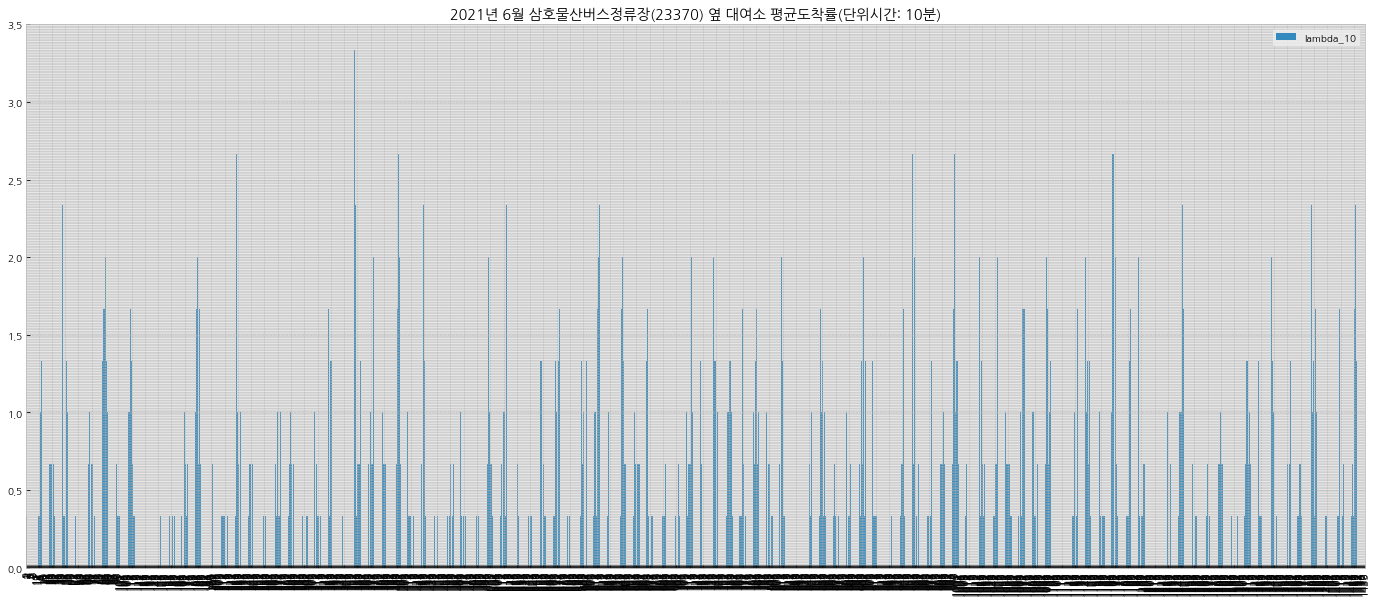

In [44]:
result.plot(kind = 'bar', y = 'lambda_10', figsize = (24, 10), 
            title = '2021년 6월 삼호물산버스정류장(23370) 옆 대여소 평균도착률(단위시간: 10분)')
plt.show()

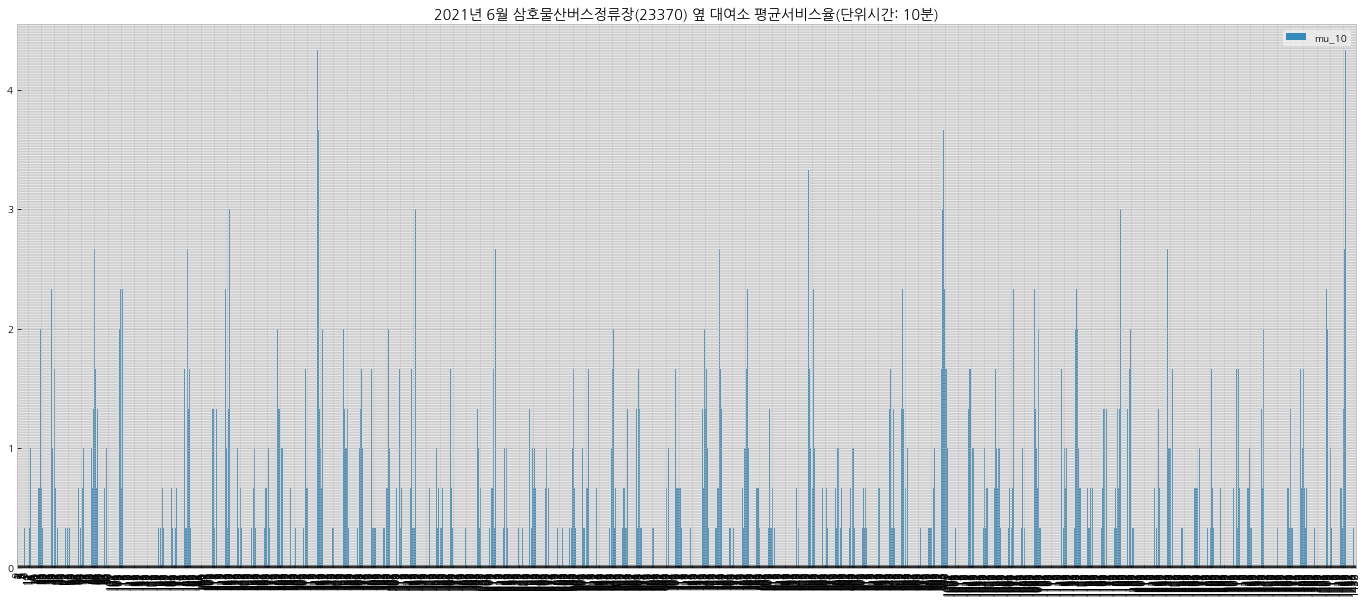

In [45]:
result.plot(kind = 'bar', y = 'mu_10', figsize = (24, 10), 
            title = '2021년 6월 삼호물산버스정류장(23370) 옆 대여소 평균서비스율(단위시간: 10분)')
plt.show()

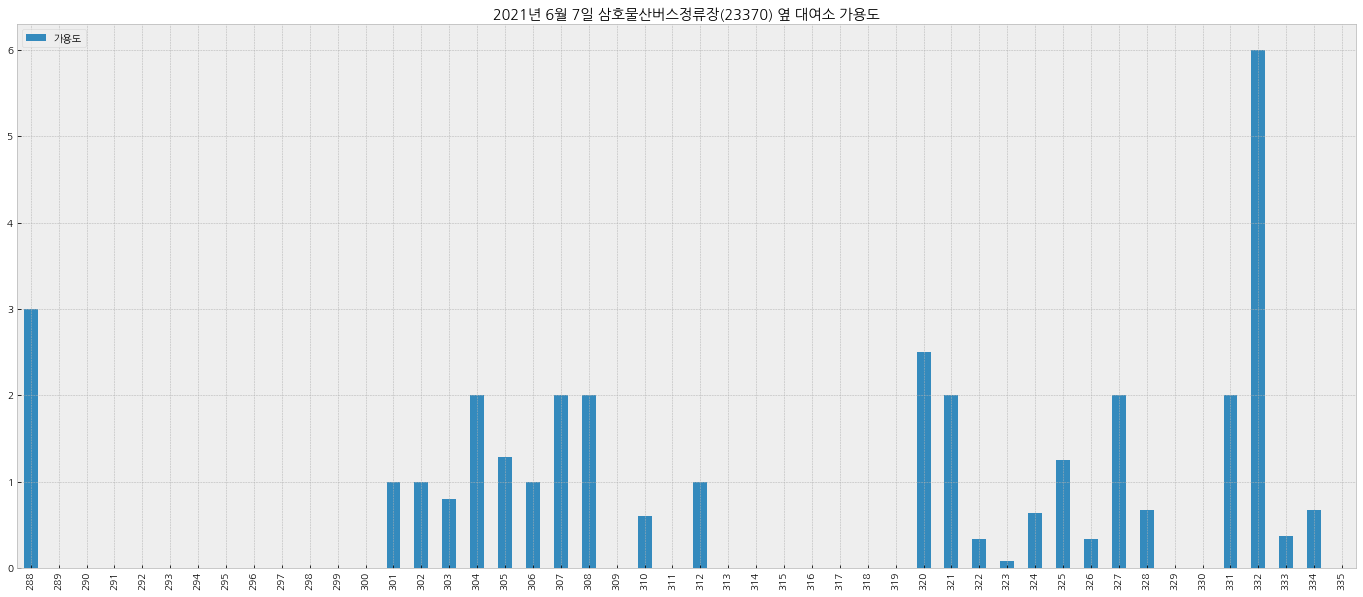

In [45]:
result_7.plot(kind = 'bar', y = '가용도', figsize = (24, 10), 
            title = '2021년 6월 7일 삼호물산버스정류장(23370) 옆 대여소 가용도')
plt.show()

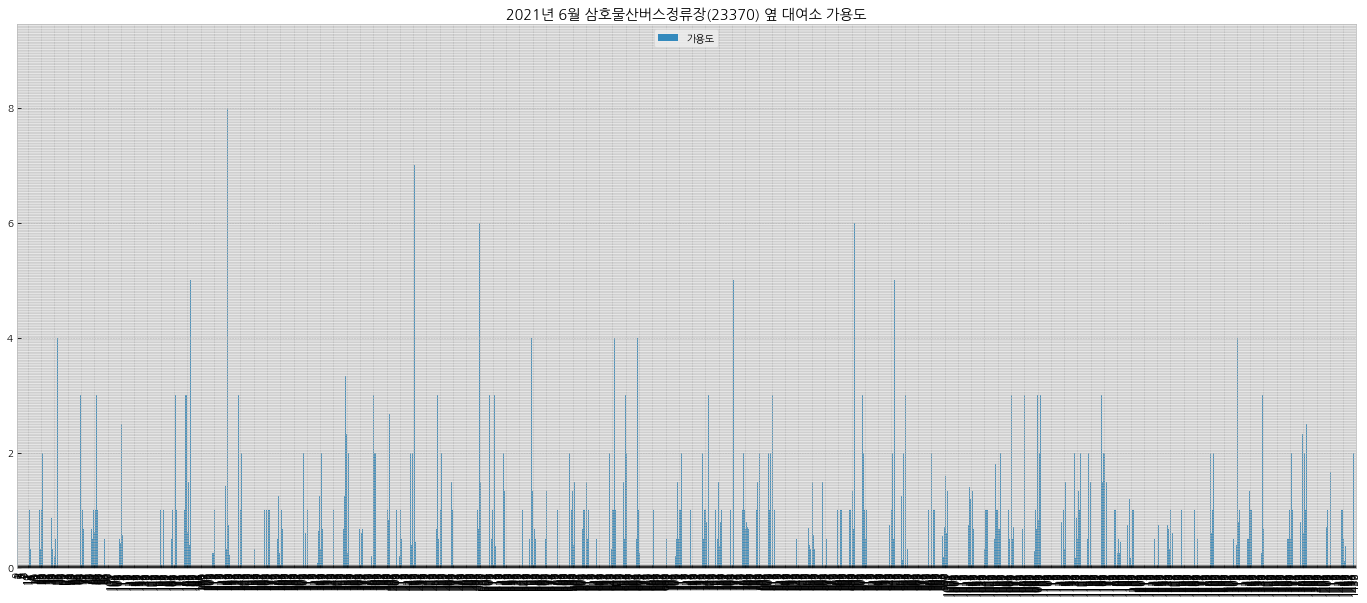

In [46]:
result.plot(kind = 'bar', y = '가용도', figsize = (24, 10), 
            title = '2021년 6월 삼호물산버스정류장(23370) 옆 대여소 가용도')
plt.show()

## 4.4 초과수요율(excess demand rate)

In [47]:
df_rental.head()

,day,hour,minute,mu_10
0,1,0,0,0.333333
1,1,0,30,0.333333
2,1,1,0,0.000000
3,1,1,30,0.000000
4,1,2,0,0.333333


In [48]:
answer = df_rental
answer.head()

,day,hour,minute,mu_10
0,1,0,0,0.333333
1,1,0,30,0.333333
2,1,1,0,0.000000
3,1,1,30,0.000000
4,1,2,0,0.333333


In [49]:
answer['obs'] = -1.0
answer.head()

,day,hour,minute,mu_10,obs
0,1,0,0,0.333333,-1.0
1,1,0,30,0.333333,-1.0
2,1,1,0,0.000000,-1.0
3,1,1,30,0.000000,-1.0
4,1,2,0,0.333333,-1.0


In [50]:
for i in range(1, len(answer) - 1):
    answer['obs'][i] = (answer['mu_10'][i-1]+answer['mu_10'][i]+answer['mu_10'][i+1]) / 3
answer.head()

,day,hour,minute,mu_10,obs
0,1,0,0,0.333333,-1.000000
1,1,0,30,0.333333,0.222222
2,1,1,0,0.000000,0.111111
3,1,1,30,0.000000,0.111111
4,1,2,0,0.333333,0.111111


In [51]:
answer['prior'] = -1.0
answer.head()

,day,hour,minute,mu_10,obs,prior
0,1,0,0,0.333333,-1.000000,-1.0
1,1,0,30,0.333333,0.222222,-1.0
2,1,1,0,0.000000,0.111111,-1.0
3,1,1,30,0.000000,0.111111,-1.0
4,1,2,0,0.333333,0.111111,-1.0


In [52]:
for i in range(289, len(answer)):
    answer['prior'][i] = (answer['mu_10'][i-289] + answer['mu_10'][i-288] + answer['mu_10'][i-287]
                          +answer['mu_10'][i-241] + answer['mu_10'][i-240] + answer['mu_10'][i-239]
                         + answer['mu_10'][i-193] + answer['mu_10'][i-192] + answer['mu_10'][i-191]
                         + answer['mu_10'][i-145] + answer['mu_10'][i-144] + answer['mu_10'][i-143]
                         + answer['mu_10'][i-97] + answer['mu_10'][i-96] + answer['mu_10'][i-95]
                         + answer['mu_10'][i-49] + answer['mu_10'][i-48] + answer['mu_10'][i-47]) / 18
answer.head()

,day,hour,minute,mu_10,obs,prior
0,1,0,0,0.333333,-1.000000,-1.0
1,1,0,30,0.333333,0.222222,-1.0
2,1,1,0,0.000000,0.111111,-1.0
3,1,1,30,0.000000,0.111111,-1.0
4,1,2,0,0.333333,0.111111,-1.0


In [53]:
answer = answer[answer['obs'] != -1]
answer = answer[answer['prior'] != -1]
answer.head()

,day,hour,minute,mu_10,obs,prior
289,7,0,30,0.0,0.111111,0.185185
290,7,1,0,0.0,0.000000,0.074074
291,7,1,30,0.0,0.000000,0.055556
292,7,2,0,0.0,0.000000,0.074074
293,7,2,30,0.0,0.222222,0.092593


In [54]:
answer['excess_demand'] = (3 * answer['obs'] + 18 * answer['prior']) / 21
answer.head()

,day,hour,minute,mu_10,obs,prior,excess_demand
289,7,0,30,0.0,0.111111,0.185185,0.174603
290,7,1,0,0.0,0.000000,0.074074,0.063492
291,7,1,30,0.0,0.000000,0.055556,0.047619
292,7,2,0,0.0,0.000000,0.074074,0.063492
293,7,2,30,0.0,0.222222,0.092593,0.111111


In [55]:
plt.style.use('bmh')

In [56]:
answer_7 = answer[answer['day'] == 7]
answer_7.head()

,day,hour,minute,mu_10,obs,prior,excess_demand
289,7,0,30,0.0,0.111111,0.185185,0.174603
290,7,1,0,0.0,0.000000,0.074074,0.063492
291,7,1,30,0.0,0.000000,0.055556,0.047619
292,7,2,0,0.0,0.000000,0.074074,0.063492
293,7,2,30,0.0,0.222222,0.092593,0.111111


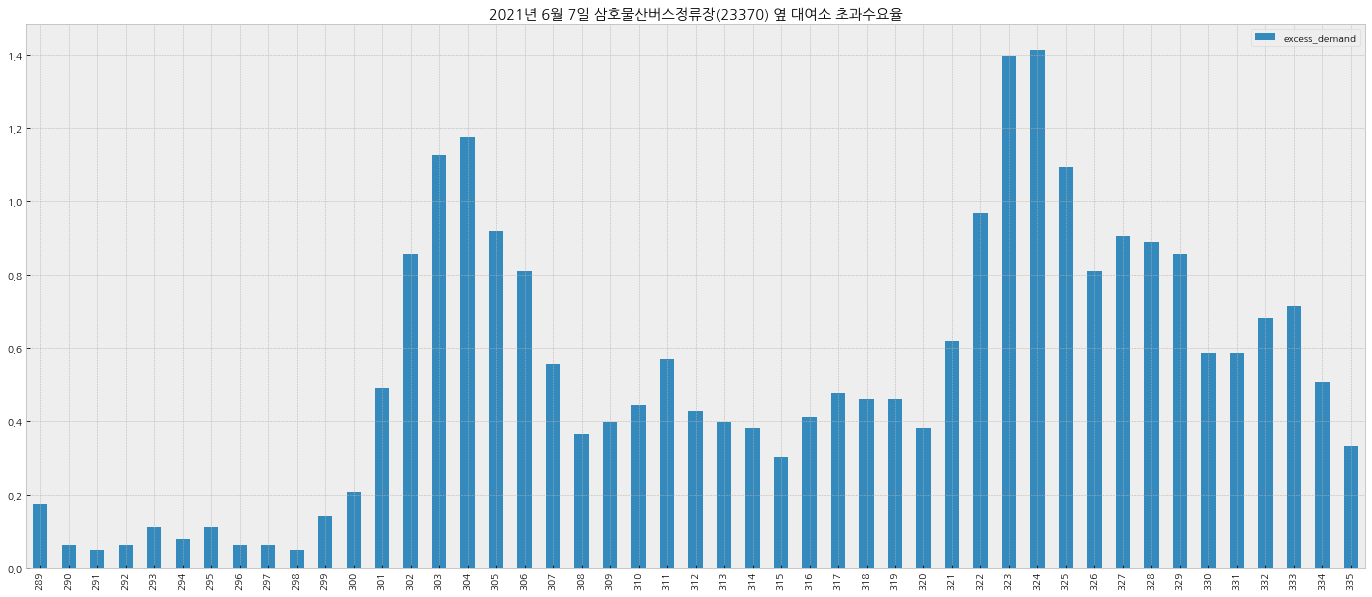

In [57]:
answer_7.plot(kind = 'bar', y = 'excess_demand', figsize = (24, 10), 
            title = '2021년 6월 7일 삼호물산버스정류장(23370) 옆 대여소 초과수요율')
plt.show()

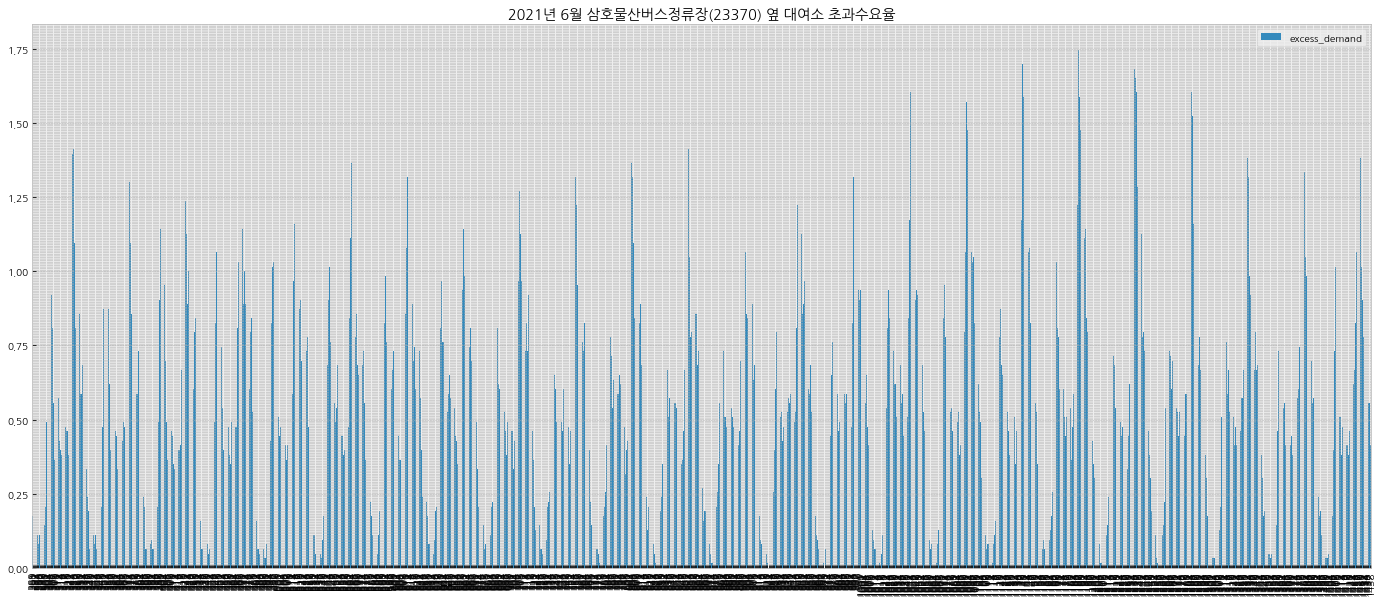

In [58]:
answer.plot(kind = 'bar', y = 'excess_demand', figsize = (24, 10), 
            title = '2021년 6월 삼호물산버스정류장(23370) 옆 대여소 초과수요율')
plt.show()

## 4.5 평균도착률, 평균서비스율, 가용도 날짜 상관없이 시간만 가지고 분석

In [59]:
df_rental = df[['대여일시', '대여대여소명', '대여월', '대여일', '대여요일', '대여시간', '대여시간_분']]
df_rental.reset_index(drop = True, inplace = True)
df_rental.head()

,대여일시,대여대여소명,대여월,대여일,대여요일,대여시간,대여시간_분
0,2021-06-01 00:00:01,LG베스트샵 종암점,6,1,1,0,0
1,2021-06-01 00:00:01,영등포구청역 1번출구,6,1,1,0,0
2,2021-06-01 00:00:02,서남병원 후문,6,1,1,0,0
3,2021-06-01 00:00:06,안암2교 옆,6,1,1,0,0
4,2021-06-01 00:00:06,한성대입구역2번출구,6,1,1,0,0


In [60]:
df_rental = df_rental[df_rental['대여대여소명'] == '삼호물산버스정류장(23370) 옆']
df_rental.reset_index(drop = True, inplace = True)
df_rental.head()

,대여일시,대여대여소명,대여월,대여일,대여요일,대여시간,대여시간_분
0,2021-06-01 00:16:26,삼호물산버스정류장(23370) 옆,6,1,1,0,16
1,2021-06-01 00:45:23,삼호물산버스정류장(23370) 옆,6,1,1,0,45
2,2021-06-01 02:05:31,삼호물산버스정류장(23370) 옆,6,1,1,2,5
3,2021-06-01 04:25:38,삼호물산버스정류장(23370) 옆,6,1,1,4,25
4,2021-06-01 06:47:17,삼호물산버스정류장(23370) 옆,6,1,1,6,47


In [61]:
df_rental['unit_time'] = df_rental['대여시간_분'].apply(lambda x: x//10)
df_rental.head()

,대여일시,대여대여소명,대여월,대여일,대여요일,대여시간,대여시간_분,unit_time
0,2021-06-01 00:16:26,삼호물산버스정류장(23370) 옆,6,1,1,0,16,1
1,2021-06-01 00:45:23,삼호물산버스정류장(23370) 옆,6,1,1,0,45,4
2,2021-06-01 02:05:31,삼호물산버스정류장(23370) 옆,6,1,1,2,5,0
3,2021-06-01 04:25:38,삼호물산버스정류장(23370) 옆,6,1,1,4,25,2
4,2021-06-01 06:47:17,삼호물산버스정류장(23370) 옆,6,1,1,6,47,4


In [62]:
df_rental = pd.DataFrame(df_rental.groupby(['대여시간', 'unit_time']).size()).sort_index()
df_rental.head()

0
대여시간 unit_time    
0    0          11
     1           6
     2          11
     3           3
     4           3

In [63]:
df_rental.reset_index(inplace = True)
df_rental.head()

,대여시간,unit_time,0
0,0,0,11
1,0,1,6
2,0,2,11
3,0,3,3
4,0,4,3


In [64]:
df_rental = df_rental.rename(columns = {0 : 'count'})
df_rental.head()

,대여시간,unit_time,count
0,0,0,11
1,0,1,6
2,0,2,11
3,0,3,3
4,0,4,3


In [65]:
df_rental = pd.DataFrame(df_rental.groupby(['대여시간']).sum()).sort_index()
df_rental.head()

,unit_time,count
대여시간,,
0,15,40
1,15,25
2,11,15
3,11,13
4,6,6


In [66]:
df_rental.reset_index(inplace = True)
df_rental.head()

,대여시간,unit_time,count
0,0,15,40
1,1,15,25
2,2,11,15
3,3,11,13
4,4,6,6


In [67]:
df_rental.drop(['unit_time'], axis = 1, inplace = True)
df_rental.head()

,대여시간,count
0,0,40
1,1,25
2,2,15
3,3,13
4,4,6


In [68]:
df_rental['mu_10'] = df_rental['count'] / 6
df_rental.head()

,대여시간,count,mu_10
0,0,40,6.666667
1,1,25,4.166667
2,2,15,2.500000
3,3,13,2.166667
4,4,6,1.000000


In [69]:
df_rental.drop(['count'], axis = 1, inplace = True)
df_rental.head()

,대여시간,mu_10
0,0,6.666667
1,1,4.166667
2,2,2.500000
3,3,2.166667
4,4,1.000000


In [70]:
df_return = df[['반납일시', '반납대여소명', '반납월', '반납일', '반납요일', '반납시간', '반납시간_분']]
df_return.head()

,반납일시,반납대여소명,반납월,반납일,반납요일,반납시간,반납시간_분
1342,2021-06-01 00:15:20,용문2교 옆,6,1,1,0,15
1343,2021-06-01 00:11:17,유원목동아파트 앞,6,1,1,0,11
1344,2021-06-01 00:06:00,잣절보도육교 아래,6,1,1,0,6
1345,2021-06-01 00:04:51,보문역6번출구 앞,6,1,1,0,4
1346,2021-06-01 00:23:20,상왕십리역 4번 출구 앞,6,1,1,0,23


In [71]:
df_return = df_return[df_return['반납대여소명'] == '삼호물산버스정류장(23370) 옆']
df_return.reset_index(drop = True, inplace = True)
df_return.head()

,반납일시,반납대여소명,반납월,반납일,반납요일,반납시간,반납시간_분
0,2021-06-01 00:06:51,삼호물산버스정류장(23370) 옆,6,1,1,0,6
1,2021-06-01 01:41:05,삼호물산버스정류장(23370) 옆,6,1,1,1,41
2,2021-06-01 02:08:54,삼호물산버스정류장(23370) 옆,6,1,1,2,8
3,2021-06-01 06:50:40,삼호물산버스정류장(23370) 옆,6,1,1,6,50
4,2021-06-01 07:07:01,삼호물산버스정류장(23370) 옆,6,1,1,7,7


In [72]:
df_return['unit_time'] = df_return['반납시간_분'].apply(lambda x: x//10)
df_return.head()

,반납일시,반납대여소명,반납월,반납일,반납요일,반납시간,반납시간_분,unit_time
0,2021-06-01 00:06:51,삼호물산버스정류장(23370) 옆,6,1,1,0,6,0
1,2021-06-01 01:41:05,삼호물산버스정류장(23370) 옆,6,1,1,1,41,4
2,2021-06-01 02:08:54,삼호물산버스정류장(23370) 옆,6,1,1,2,8,0
3,2021-06-01 06:50:40,삼호물산버스정류장(23370) 옆,6,1,1,6,50,5
4,2021-06-01 07:07:01,삼호물산버스정류장(23370) 옆,6,1,1,7,7,0


In [73]:
df_return = pd.DataFrame(df_return.groupby(['반납시간', 'unit_time']).size()).sort_index()
df_return.head()

0
반납시간 unit_time    
0    0          15
     1          11
     2           9
     3           7
     4          16

In [74]:
df_return.reset_index(inplace = True)
df_return.head()

,반납시간,unit_time,0
0,0,0,15
1,0,1,11
2,0,2,9
3,0,3,7
4,0,4,16


In [75]:
df_return = df_return.rename(columns = {0 : 'count'})
df_return.head()

,반납시간,unit_time,count
0,0,0,15
1,0,1,11
2,0,2,9
3,0,3,7
4,0,4,16


In [76]:
df_return = pd.DataFrame(df_return.groupby(['반납시간']).sum()).sort_index()
df_return.head()

,unit_time,count
반납시간,,
0,15,65
1,15,59
2,15,27
3,12,18
4,15,14


In [77]:
df_return.reset_index(inplace = True)
df_return.head()

,반납시간,unit_time,count
0,0,15,65
1,1,15,59
2,2,15,27
3,3,12,18
4,4,15,14


In [78]:
df_return.drop(['unit_time'], axis = 1, inplace = True)
df_return.head()

,반납시간,count
0,0,65
1,1,59
2,2,27
3,3,18
4,4,14


In [79]:
df_return['lambda_10'] = df_return['count'] / 6
df_return.head()

,반납시간,count,lambda_10
0,0,65,10.833333
1,1,59,9.833333
2,2,27,4.500000
3,3,18,3.000000
4,4,14,2.333333


In [80]:
df_return.drop(['count'], axis = 1, inplace = True)
df_return.head()

,반납시간,lambda_10
0,0,10.833333
1,1,9.833333
2,2,4.500000
3,3,3.000000
4,4,2.333333


In [81]:
df_rental = df_rental.rename(columns = {'대여시간':'hour'})
df_rental.head()

,hour,mu_10
0,0,6.666667
1,1,4.166667
2,2,2.500000
3,3,2.166667
4,4,1.000000


In [82]:
df_return = df_return.rename(columns = {'반납시간':'hour'})
df_return.head()

,hour,lambda_10
0,0,10.833333
1,1,9.833333
2,2,4.500000
3,3,3.000000
4,4,2.333333


In [83]:
result = pd.merge(df_return, df_rental, how = 'left')
result.head()

,hour,lambda_10,mu_10
0,0,10.833333,6.666667
1,1,9.833333,4.166667
2,2,4.500000,2.500000
3,3,3.000000,2.166667
4,4,2.333333,1.000000


In [84]:
result['가용도'] = result['lambda_10'] / result['mu_10']
result.head()

,hour,lambda_10,mu_10,가용도
0,0,10.833333,6.666667,1.625000
1,1,9.833333,4.166667,2.360000
2,2,4.500000,2.500000,1.800000
3,3,3.000000,2.166667,1.384615
4,4,2.333333,1.000000,2.333333


In [85]:
plt.style.use('bmh')

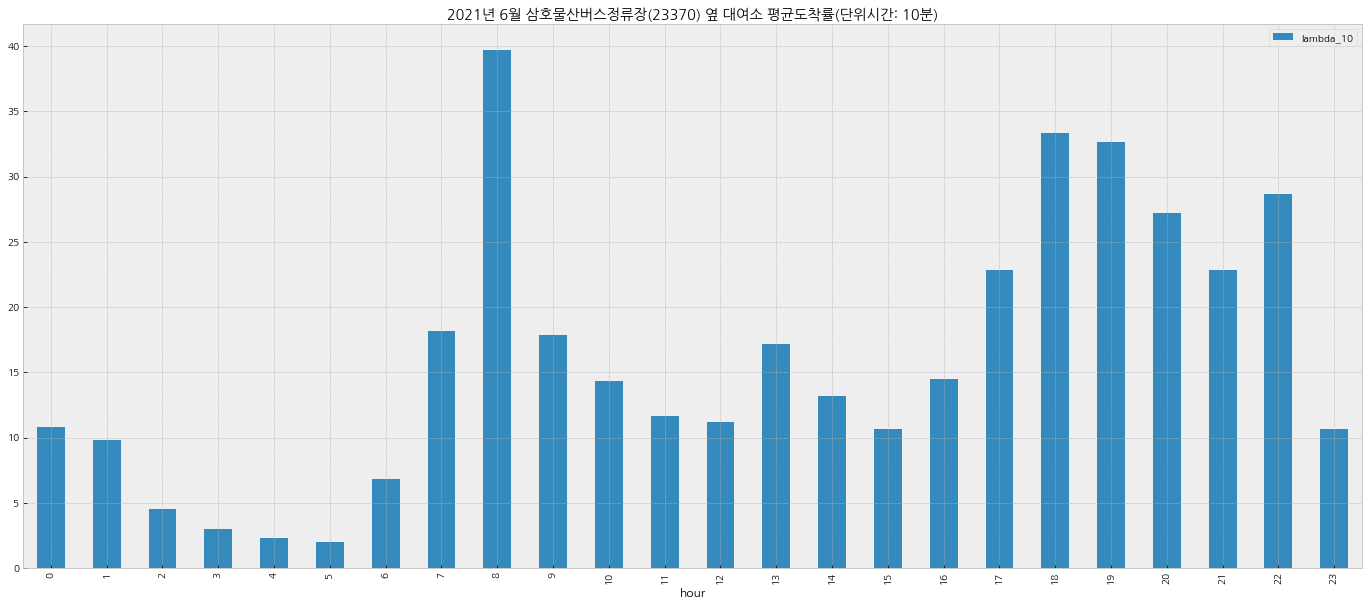

In [86]:
result.plot(kind = 'bar', x = 'hour', y = 'lambda_10', figsize = (24, 10), 
            title = '2021년 6월 삼호물산버스정류장(23370) 옆 대여소 평균도착률(단위시간: 10분)')
plt.show()

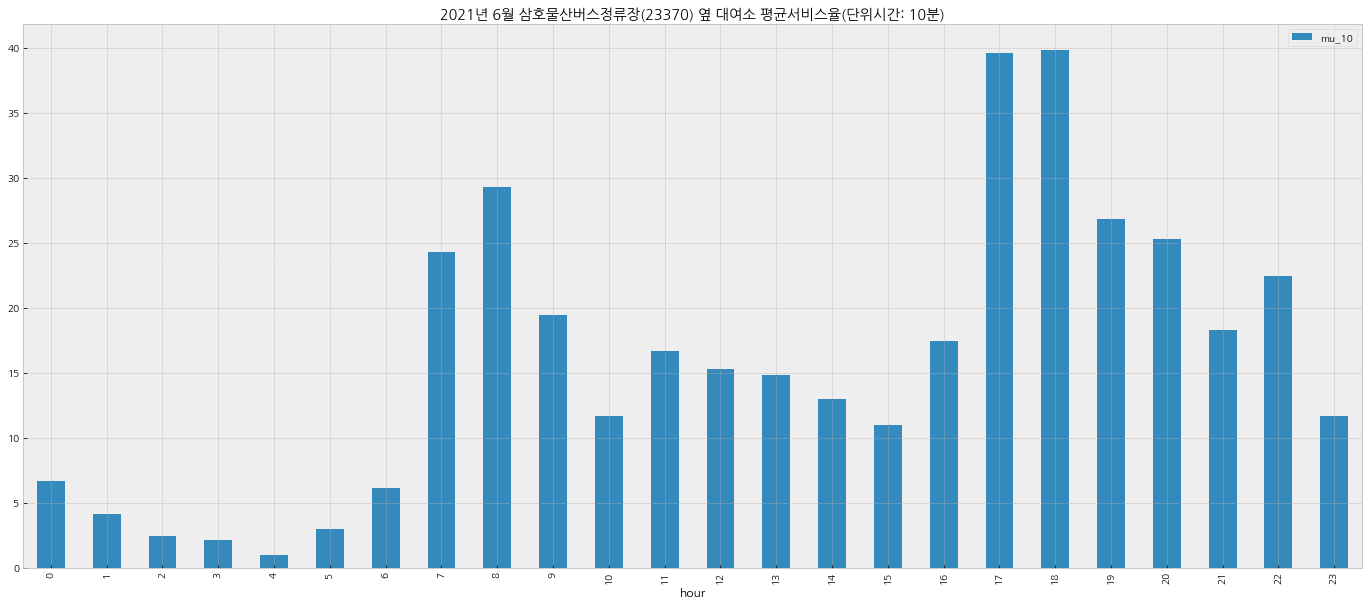

In [87]:
result.plot(kind = 'bar', x = 'hour', y = 'mu_10', figsize = (24, 10), 
            title = '2021년 6월 삼호물산버스정류장(23370) 옆 대여소 평균서비스율(단위시간: 10분)')
plt.show()

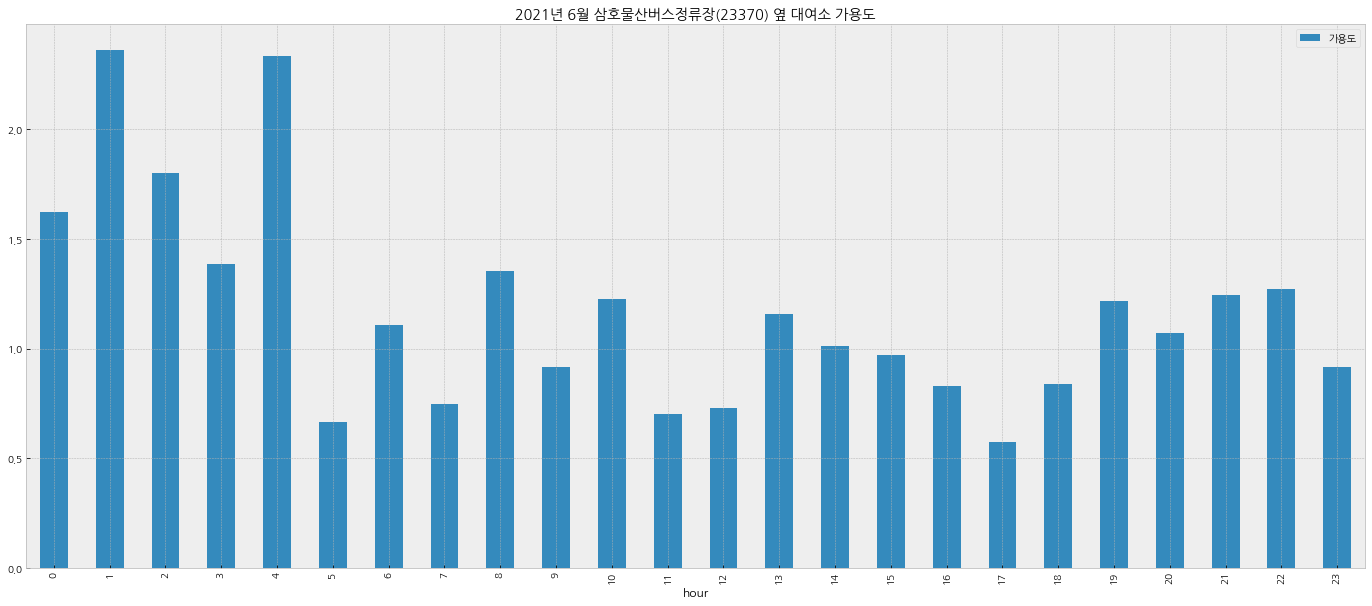

In [88]:
result.plot(kind = 'bar', x = 'hour', y = '가용도', figsize = (24, 10), 
            title = '2021년 6월 삼호물산버스정류장(23370) 옆 대여소 가용도')
plt.show()